<h1 style="text-align: center;"><span style="color: #000080;">Matemática Aplicada a la Tecnología Informática 2020-21<br /></span></h1>
<h1 style="text-align: center;"><span style="color: #000080;">Práctica 1: Repaso Teoría de Grafos</span></h1>
<p><span style="color: #000080;"><br /></span></p>
<h2>Representación de grafos</h2>
<p>Comenzaremos viendo los distintos métodos para representar grafos en Sage (lista de adyacencia, lista de incidencia, matriz de adyacencia y matriz de incidencia) y también las opciones para su representación gráfica.</p>
<h3>Lista de adyacencia</h3>
<p>A partir de la lista de sus aristas, podemos definir un grafo en Sage utilizando <em><strong>add_edge</strong></em>.</p>

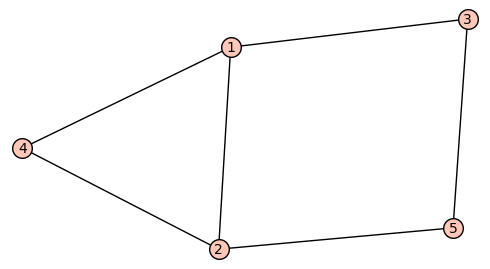

In [1]:
g=Graph({})
l=[(1,2),(3,1),(1,4),(2,5),(2,4),(3,5)]
for a in l:
  g.add_edge(a)
g.show(figsize=5)

<h3>Lista de incidencia</h3>
<p>Podemos definir el grafo mediante su lista de incidencia. Para ello deberemos pasar como parámetro a Graph un "diccionario", es decir, una lista entre llaves de modo que cada elemento es un vértice, dos puntos y la lista de vertices a los que está unido.</p>

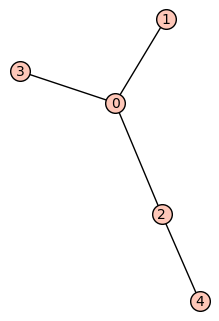

In [2]:
g = Graph({0:[1,2,3], 2:[4]}); g.show(figsize=5)

<h3>Matriz de adyacencia</h3>
<p>Recordemos que la matriz de adyacencia es una matriz que en la posición $(i,j)$ guarda un $1$ si los vértices $i$ y $j$ son adyacentes y un $0$ en caso contrario. Si pasamos una matriz de este tipo al constructor <em><strong>Graph</strong></em>, genera un grafo con esa matriz de adyacencia.  </p>

In [3]:
M=matrix([[0, 1, 0, 1],[1, 0, 1, 0],[0, 1, 0, 1],[1, 0, 1, 0]]);M

[0 1 0 1]
[1 0 1 0]
[0 1 0 1]
[1 0 1 0]

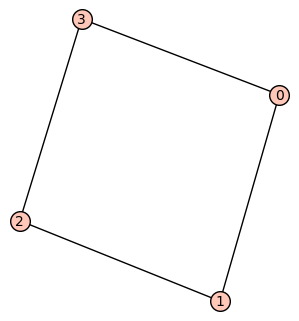

In [4]:
g=Graph(M);g.show(figsize=5)

<h3>Matriz de incidencia</h3>
<p>En la matriz de incidencia, cada fila corresponde a una arista, indicando con un $-1$ y un $1$ son vertices incidentes a dicha arista. Sin embargo en Sage se utiliza cada columna como arista, así que debemos trasponer las matrices.</p>

In [5]:
M = Matrix([[-1,0,0,0,1,0],[ 1,-1,0,0,0,0],[ 0,1,-1,0,0,0], [0,0,1,-1,0,0], [0,0,0,1,-1,0]]); M

[-1  0  0  0  1  0]
[ 1 -1  0  0  0  0]
[ 0  1 -1  0  0  0]
[ 0  0  1 -1  0  0]
[ 0  0  0  1 -1  0]

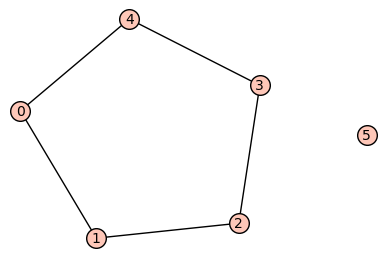

In [6]:
g=Graph(M.transpose());show(g)

<h3>Editor de grafos</h3>
<p>Para generar grafos de modo rápico (por ejemplo, para elaborar ejemplos para probar algoritmos) lo más práctico es utilizar el editor de grafos. Se ejecuta mediante el comando <em><strong>graph_editor</strong></em>. Si pasamos un grafo como parámetro al editor de grafos, será este el grafo que editemos. Se pueden añadir vértices, mover vértices y añadir aristas. En "variable name" debemos escribir el nombre de variable en el que guardará el grafo. Una vez terminada la edición, pulsamos save.</p>

In [7]:
graph_editor();

ModuleNotFoundError: No module named 'sagenb'

<h3>Representando grafos</h3>

<p>Los siguientes ejemplos muestran cómo cambiar el color de los vértices y su tamaño o el de las aristas. Para ello se crea un diccionario (una lista entre llaves) de modo que cada entrada de la lista sea una pareja separada por :, el elemento de la izquierda será el color y el de la derecha la lista de elementos a dibujar con ese color.</p>

In [ ]:
P = graphs.PetersenGraph()
d = {'#FF0000':[0,5], '#FF9900':[1,6], '#FFFF00':[2,7], '#00FF00':[3,8], '#0000FF':[4,9]}
P.plot(vertex_colors=d,vertex_size=500).show(figsize=4)

In [ ]:
P = graphs.PetersenGraph()
E=P.edges();
e={'#FFFF00':[E[k] for k in [0..2]],'#FF00FF':[E[k] for k in [3,5..14]],'#00FFFF':[E[k] for k in [4,6..14]]}
P.plot(edge_colors=e,thickness=3).show(figsize=4)

In [ ]:
stnc = 'abcdeda'
g = Graph({}, loops=True, multiedges=True)
for a,b in [(stnc[i], stnc[i+1]) for i in xrange(len(stnc)-1)]:
    g.add_edge(a, b, 'peso '+b)
g.plot(color_by_label=True,edge_labels=True, edge_style='solid',thickness=3).show(figsize=(4,7))

<h3>Grafo dirigido y/o etiquetado</h3>
<p>Todo lo anterior es válido para grafos dirigidos, sin más que cambiar <strong><em>Graph</em></strong> por <strong><em>DiGraph</em></strong>.</p>

In [8]:
stnc = 'abcdeda'
g = DiGraph({}, loops=True, multiedges=True)
for a,b in [(stnc[i], stnc[i+1]) for i in xrange(len(stnc)-1)]:
    g.add_edge(a, b, b)
g.plot(color_by_label=True, edge_style='solid').show(figsize=4)

NameError: name 'xrange' is not defined

<p>Para introducir un grafo etiquetado a partir de la matriz de adyacencia, debemos utilizar el parámetro <strong><em>format='weighted_adjacency_matrix'</em></strong>.</p>

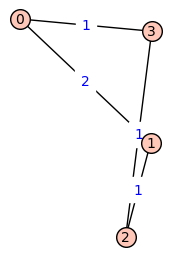

In [9]:
M=matrix([[0, 2, 0, 1],[2, 0, 1, 0],[0, 1, 0, 1],[1, 0, 1, 0]]);M
g=Graph(M,format='weighted_adjacency_matrix');g.graphplot(edge_labels=True).show(figsize=4)

<p>También es válido con grafos dirigidos.</p>

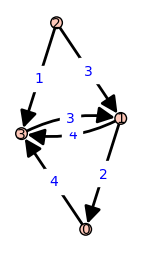

In [10]:
M=matrix([[0, 0, 0, 4],[2, 0, 0, 4],[0, 3, 0, 1],[0, 3, 0, 0]]);M
g=DiGraph(M,format='weighted_adjacency_matrix');g.graphplot(edge_labels=True).show(figsize=4)

<h2>Operaciones con grafos</h2>
<h3>Grafos "predefinidos"</h3>
<p>Sage tiene predefinidos muchos grafos, constructores de grafos y generadores aleatorios de grafos. Escribe <em><strong>graphs.</strong></em> y pulsa <strong><tab></strong> para ver todas las opciones.</p>
<p>Por ejemplo, <em><strong>graphs.CompleteGraph(n)</strong></em> genera el grafo completo de n vértices.</p>

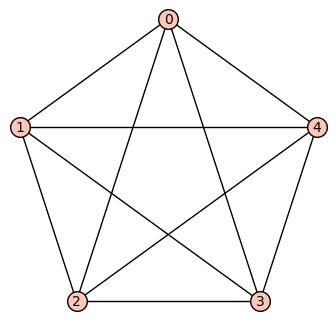

In [11]:
g=graphs.CompleteGraph(5);g.plot().show(figsize=5)

<p>También podemos generar el grafo de un cubo en dimensión 4:</p>

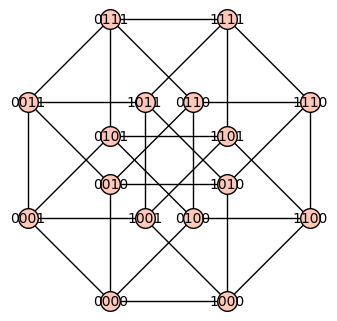

In [12]:
g=graphs.CubeGraph(4);g.plot().show(figsize=5)

<h3>Elementos de un grafo</h3>
<p>Podemos obtener la lista de vértices mediante el método <em><strong>vertices</strong></em>. Para recorrer los vértices podemos utlizar <em><strong>vertex_iterator</strong></em> o símplemente "recorriendo el grafo".</p>

In [13]:
g.vertices()

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

In [14]:
for u in g.vertex_iterator():
    print u

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(u)? (<ipython-input-14-75fb96788a3e>, line 2)

In [15]:
for u in g:
    print u

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(u)? (<ipython-input-15-df537b077a42>, line 2)

<p>Análogamente, para generar las aristas, tenemos el método <em><strong>edges</strong></em> y para recorrerlas, <em><strong>edge_iterator.</strong></em></p>

In [16]:
for e in g.edge_iterator():
    print e

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(e)? (<ipython-input-16-286524fbf597>, line 2)

<p>Para saber si una arista está en el grafo, usamos<em><strong> has_edge</strong></em>.</p>

In [17]:
g.has_edge('1000','0000')

True

In [18]:
g.has_edge('1000','0100')

False

<p>Para obtener los vértices adyacentes e iterarlos, utilizamos<em><strong> neighbors</strong></em> y <strong><em>neighbor_iterator</em></strong>, respectivamente.</p>

In [19]:
g.neighbors('1000')

['0000', '1001', '1010', '1100']

In [20]:
for i in g.neighbor_iterator('1000'):
 print i

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i)? (<ipython-input-20-2d7411f6f8c6>, line 2)

<p>De todos modos, siempre podemos resolver cualquier problema de grafos utilizando listas y la matriz de adyacencia. Además suele ser más sencillo que los métodos anteriores. Para obtener la matriz de adyacencia de un grafo, usamos <strong><em>adjacency_matrix</em></strong>.</p>

In [21]:
M=g.adjacency_matrix();M

[0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0]
[1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0]
[1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
[0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]
[1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0]
[0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0]
[0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0]
[0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0]
[0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0]
[0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1]
[0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0]
[0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1]
[0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1]
[0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0]

<h2>Tipos de datos para grafos</h2>
<p>Vamos a estudiar dos tipos de datos de Python que son muy útiles a la hora de programar grafos. La documentación completa se puede consultar en:</p>
<p><a>http://docs.python.org/2/tutorial/datastructures.html</a></p>
<h3>Conjuntos</h3>
<p>Un conjunto es similar a una lista pero no permite repeticiones de elementos. Por tanto se suele utilizar precisamente para eliminar repeticiones de listas. Se puede definir mediante llaves o con el constructor <em><strong>Set</strong></em> aplicado a una lista.</p>

In [22]:
s={1,2,3,4,3,2,1};s

{1, 2, 3, 4}

In [23]:
Set([1,3,4,2,1,3,4,2,3,3,2,1])

{1, 2, 3, 4}

<p>Para recorrer los elementos, se utiliza la misma sintaxis que con listas.</p>

In [24]:
for i in s:
   print i

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i)? (<ipython-input-24-08ee323d0e1a>, line 2)

<h3>Diccionarios</h3>

<p>Un diccionario es un conjunto de pares de elementos separados por<em><strong> :</strong></em>. El elemento de la izquierda se llama <em>clave</em> y el de la derecha <em>valor.</em> </p>

In [25]:
tel = {'jack': 4098, 'sape': 4139}

<p>Para acceder al valor de una clave, se evalúa el diccionario en la clave.</p>

In [26]:
tel['jack']

4098

<p>Para añadir un nuevo elemento, símplemente se le asigna un valor a la nueva clave.</p>

In [27]:
tel['guido'] = 4127;tel

{'jack': 4098, 'sape': 4139, 'guido': 4127}

<p>Y para eliminar una pareja, usamos <em><strong>del</strong></em>.</p>

In [28]:
del tel['sape']

<p>También podemos construir el diccionario aplicando el constructor <em><strong>dict</strong></em> a una lista de pares, a una lista de asignaciones (sólo válido cuando las claves son texto) o usando el constructor con llaves:</p>

In [29]:
dict([('sape', 4139), ('guido', 4127), ('jack', 4098)])

{'sape': 4139, 'guido': 4127, 'jack': 4098}

In [30]:
dict(sape=4139, guido=4127, jack=4098)

{'sape': 4139, 'guido': 4127, 'jack': 4098}

In [31]:
{x: x**2 for x in (2, 4, 6)}

{2: 4, 4: 16, 6: 36}

<p>Por último, podemos recorrer los elementos, las claves o los valores usando los métodos <em><strong>iteritems</strong></em>,<em><strong> iterkeys</strong></em> e<em><strong> itervalues</strong></em>, respectivamente.</p>

In [32]:
for n, t in tel.iteritems():
   print n, t

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(n, t)? (<ipython-input-32-af1f9f92bfac>, line 2)

In [33]:
for n in tel.iterkeys():
   print n, tel[n]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(n, tel[n])? (<ipython-input-33-6d0e90ac5f23>, line 2)

In [34]:
for  t in tel.itervalues():
   print  t

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(t)? (<ipython-input-34-dfa273efec88>, line 2)

<h2 style="text-align: center;"><span style="color: #000000;">EJERCICIOS<br /></span></h2>
<p><span style="color: #000000;"><br /></span></p>
<p><span style="color: #000000;">En los siguientes ejercicios se tratará de codificar funciones sencillas de teoría de grafos, para repasar los conceptos y algoritmos. Las funciones tienen que estar convenientemente explicadas, con un comentario al comienzo de la función como líneas de comentario en cada operación que se considere compleja (en particular en los bucles y llamadas recursivas).</span></p>
<p><span style="color: #000000;">De los siguientes ejercicios elije en el apartado A el que corresponda a tu última cifra del DNI (a la última cifra de la suma de DNI si sois dos), en el apartado B a la penúltima y así sucesivamente.<br /></span></p>
<hr />
<p><span style="color: #000000;">A. Genera un grafo con las siguientes propiedades (en caso de no existir, razona porqué no es posible un grafo así):</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">0,1. 3-regular con un conjunto independiente formado por 4 vértices</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">1,3. 3-regular con un clique formado por 4 vértices</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">2,5. 4-regular y euleriano</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">3,7. Euleriano y hamiltoniano</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">4,9. Euleriano pero no hamiltoniano</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">5,0. Conexo, 4-regular pero no hamiltoniano</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">6,2. No Euleriano pero sí hamiltoniano</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">7,4. No conexo, 2-regular y con el complemento 3-regular</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">8,6. Conexo, hamiltoniano pero no euleriano</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">9,8. No euleriano y con secuencia de grados 4 2 2 2 2 2 2.<br /></span></p>

In [47]:
k4=graphs.CompleteGraph(4)
k4.is_eulerian()
k4.is_hamiltonian()

True

<p><span style="color: #000000;">B. Crea una función que reciba un grafo y devuelva:</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">0,5. El número de aristas</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">1,6. La secuencia de grados</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">2,7. Si contiene o no un clique de 3 vértices<br /></span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">3,8. Si el grafo es regular</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">4,9. Si el grafo es un árbol</span></p>

In [49]:
def es_regular(g):
    return g.is_regular()
es_regular(k4)

True

<p><span style="color: #000000;">C. Crea varios grafos de prueba, codifica la función descrita en el apartado y pruébala.<br /></span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">0,4,8. Crea una función que reciba dos caminos simples (listas de vértices), con el primero y el último en común y devuelva un ciclo.<br /></span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">1,5,9. Crea una función que reciba una secuencia (lista decreciente de números positivos) y devuelva un grafo con dicha secuencia de grados (en caso de que no exista, devolverá un grafo vacío).</span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">2,6. Crea una función que reciba un grafo y un vértice y devuelva la componente conexa de dicho vértice. </span></p>
<p style="margin-left: 30px;"><span style="color: #000000;">3,7. Crea una función que reciba un grafo y una lista de vértices y calcule en número de componentes conexas del grafo resultante de eliminar dichos vértices. Para calcular el número de componentes conexas utilizará el método connected_components_number.</span></p>

1


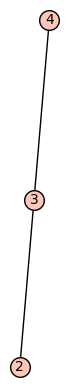

In [70]:
g=Graph({1:[2,3,4],2:[1,3],3:[1,2],4:[3,5],5:[1,3]})
l=[1,5]
def num_componentes_conexas(g,l):
    for i in l:
        g.delete_vertex(i)
    return g.connected_components_number()
print(num_componentes_conexas(g,l))
g.plot()

<p>D. ¿Cuál es el tamaño máximo de un conjunto de números enteros entre 1 y 100 tal que la diferencia entre dos números no sea un cuadrado perfecto?</p>

In [96]:
noCuadrados=[0]
lista=[]
enc=true
for i in range(1,101):
    enc=true
    for j in noCuadrados:
        if sqrt(abs(i-j)).is_integer():
            enc=false
            break
    if enc :
        noCuadrados.append(i)
noCuadrados

[0,
 2,
 5,
 7,
 10,
 12,
 15,
 17,
 20,
 22,
 34,
 39,
 44,
 52,
 57,
 62,
 65,
 67,
 72,
 85,
 95]

<p><span style="color: #333333;">E. Crea un grafo<br /></span></p>
<p><span style="color: #333333;">    0,1,2,3,4  en el que los vértices sean los números del 1 al 10 y dos vértices serán adyacentes si uno es múltiplo del otro.</span></p>
<p><span style="color: #333333;">    5,6,7,8,9  en el que los vértices sean los números del 1 al 10 y tenemos una arista entre los vértices u y v si u divide a v.<br /></span></p>
<p><span style="color: #333333;">Añade las aristas necesarias hasta que sea completo. Representa el grafo cambiando el color de las aristas añadidas.</span></p>

In [78]:
a=3
a.is_integer()

True

<p><span style="color: #333333;">F. Crea un diccionario con los pares $n:[k n]$, para $n$ entre $1$ y $20$ y $k$ entre $2$ y $20$  de modo que $n k\leq 20$. </span></p>
<p><span style="color: #333333;">    Crea un grafo a partir del diccionario anterior. Obtén la matriz de adyacencia de este grafo.</span></p>